# demonstration of `plot_expression_across_chromosomes.py` script

Based on [here](https://github.com/fomightez/sequencework/tree/master/plot_expression_across_chromosomes).

If you'd like an active Jupyter session to run this notebook, launch one by clicking [here](https://mybinder.org/v2/gh/fomightez/cl_seq_demo-binder/master), and then upload this notebook to the session that starts up.  
Otherwise, the static version is rendered more nicely via [here](https://nbviewer.jupyter.org/github/fomightez/cl_sq_demo-binder/blob/master/notebooks/demo%20plot_expression_across_chromosomes.ipynb).



----

<div class="alert alert-block alert-warning">
<p>If you haven't used one of these notebooks before, they're basically web pages in which you can write, edit, and run live code. They're meant to encourage experimentation, so don't feel nervous. Just try running a few cells and see what happens!.</p>

<p>
    Some tips:
    <ul>
        <li>Code cells have boxes around them. When you hover over them a <i class="fa-step-forward fa"></i> icon appears.</li>
        <li>To run a code cell either click the <i class="fa-step-forward fa"></i> icon, or click on the cell and then hit <b>Shift+Enter</b>. The <b>Shift+Enter</b> combo will also move you to the next cell, so it's a quick way to work through the notebook.</li>
        <li>While a cell is running a <b>*</b> appears in the square brackets next to the cell. Once the cell has finished running the asterix will be replaced with a number.</li>
        <li>In most cases you'll want to start from the top of notebook and work your way down running each cell in turn. Later cells might depend on the results of earlier ones.</li>
        <li>To edit a code cell, just click on it and type stuff. Remember to run the cell once you've finished editing.</li>
    </ul>
</p>
</div>

----

You'll need the current version of the script to run this notebook, and the next cell will get that. (Remember if you want to make things more reproducible when you use the script with your own data, you'll want to edit calls such as this to fetch a specific version of the script. How to do this is touched upon in the comment below [here](https://stackoverflow.com/a/48587645/8508004).

In [1]:
!curl -O https://raw.githubusercontent.com/fomightez/sequencework/master/plot_expression_across_chromosomes/plot_expression_across_chromosomes.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 48390  100 48390    0     0   256k      0 --:--:-- --:--:-- --:--:--  256k


## Display Usage / Help Block

In [2]:
%run plot_expression_across_chromosomes -h

usage: plot_expression_across_chromosomes.py [-h] [-cols COLUMNS] [-l]
                                             [-chr CHRS] [-nl] [-nlim] [-s]
                                             [-ed EXP_DESIG] [-bd BASE_DESIG]
                                             [-svg] [-ndh] [-ac ADVANCE_COLOR]
                                             ANNOTATION_FILE DATA_FILE

plot_expression_across_chromosomes.py plots a ratio of expression values
across chromosomes or scaffolds of a genome to highlight regions of deviation.
Besides the options listed here, there are several `USER ADJUSTABLE VALUES`
inside the script that can be edited for easy customization. A similar plot is
called a Manhattan plot and this implementation borrows the plotting approach
and some of the features from Brent Pedersen's awesome `manhattan-plot.py`
script. **** Script by Wayne Decatur (fomightez @ github) ***

positional arguments:
  ANNOTATION_FILE       Name of file containing the genome annotation.
        

## Preparing for use of the script

#### Get data/input files.

Along with expression data, information on the genes' names and locations in form of GTF or GFF is needed to use the `plot_expression_across_chromosomes.py` script. (BED could be possible but not developed as of yet.)

For convenience, we will generate use a different script to generate mock expression data to be used in this demo. If you are curious of the output produced with real biological data, then you can examine the plots [here](https://github.com/fomightez/sequencework/tree/master/plot_expression_across_chromosomes) because the present version of [the documentation page for `plot_expression_across_chromosomes.py`](https://github.com/fomightez/sequencework/tree/master/plot_expression_across_chromosomes) only features resuls from actual yeast data.)

#### Get GTF input files

For the demo notebook, both yeast (*S. cerevisiae*) and human genetic information will be used.

Both of these genetic information files require FTP use for retrieval and that is not allowed using a Binder session, and so they have been baked into the image that gets spun up when the Jupyter session is launched from [here](https://mybinder.org/v2/gh/fomightez/cl_seq_demo-binder/master). Use the commands in the cell below to move them into the location of the active analysis. In the case of the human data there is also an unpacking step as it is a compressed archive.

The yeast GTF file retrieval is described [here](https://github.com/fomightez/simulated_data/blob/master/gene_expression/README.md).

The human GTF data is from [Ensembl](https://ensembl.org/info/data/ftp/index.html). To get the specific version asked about [here](https://github.com/fomightez/sequencework/issues/1) I adjusted the URL obtained from link in the question [here](https://www.biostars.org/p/296933/). Adjust the links and commands accordingly to match your favorite version.

In [3]:
#!curl -OL ftp://ftp.ensembl.org/pub/release-88/gtf/homo_sapiens/Homo_sapiens.GRCh38.88.chr.gtf.gz
# source: ftp://ftp.ensembl.org/pub/release-88/gtf/homo_sapiens/ , to try to address https://github.com/fomightez/sequencework/issues/1
!gunzip -k ../data/Homo_sapiens.GRCh38.88.chr.gtf.gz
!mv ../data/Homo_sapiens.GRCh38.88.chr.gtf .
!mv ../data/R64-1-1genes.gtf .

You should now be able to see `Homo_sapiens.GRCh38.88.chr.gtf` and `R64-1-1genes.gtf` listed among the files in the current working directory when you run the next cell.

In [4]:
ls

'demo get_specified_length_of_end_of_seq_from_FASTA.ipynb'
'Demo of script to get sequence from multiFASTA file when description contains matching text.ipynb'
'Demo of script to get specific subsequence from FASTA file.ipynb'
'demo plot_expression_across_chromosomes.ipynb'
 GSD/
 Homo_sapiens.GRCh38.88.chr.gtf
 plot_expression_across_chromosomes.py
 R64-1-1genes.gtf
'Use biopython to make valid CLUSTAL formatted MSAs, check sequence of manually edited alignment, and add consensus line.ipynb'


#### Making mock data

Get the script for generating mock data.

In [5]:
!curl -OL https://raw.githubusercontent.com/fomightez/simulated_data/master/gene_expression/mock_expression_ratio_generator.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30725  100 30725    0     0   182k      0 --:--:-- --:--:-- --:--:--  182k


This script can use a GTF or GFF file to extract a list of genes and produce crude simulated expression data for them.

It has two advanced features, both of which this demo will use. They are described briefly here; however, you are referred to the [official documentation](https://github.com/fomightez/simulated_data/blob/master/gene_expression/README.md) for the script for more information.

The two features to be taken advatange of here are:

- the ability to specify chromosomes or regions of chromosomes that don't have a expression ratio that averages around 1:1 for baseline vs. experiemental.

- the mock data generator script can be supplied an optional flag to only use a fraction of the genes. This is helpful when dealing with large genetic information files, like the 1.4 Gb human file. This is simply for convenience here to make the demonstration steps occur in a timely manner. (You would not want to only use a fraction of your own data.) Although for now, we will holding off on generating the human data as it can take some time,

The next cells will generate the mock data in tab-separated tabular text form. We'll do it for yeast alone for now since dealing with the human genetic data is on a much larger scale.

In [6]:
%run mock_expression_ratio_generator.py R64-1-1genes.gtf


Reading annotation file and getting data on genes and chromosomes...Information for 7126 genes parsed...
Filling in the mock values for each gene...
Mock data saved as: R64-1-1genes_mock_expression_ratios.tsv


To make things easier, we'll rename the file to something more convenient by running the next cell.

In [7]:
!mv R64-1-1genes_mock_expression_ratios.tsv sc_data.tsv #yeast S. cerevisiae

Finally we are ready to use the script.

## Basic use examples set #1: Using from the command line (or equivalent / similar)

### Run the script

We'll use some yeast data for the first few examples. Human will follow.

In [8]:
%%bash
python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv


Reading annotation file and getting data on genes and chromosomes...Information for 7126 genes parsed...The chromosomes appear to be in roman numeral form....Parsing data file...7127 lines of data parsed and relative levels for 7126 genes recorded.../srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')

***Notice:***The 38 points beyond the bounds of y-axis are drawn as open triangles at the edge; a limit was imposed to avoid extreme values compressing the typically important range; run with `--no_limits` or `--no_log` to see these accurately.

Plot i

In the above cell and elsewhere in this notebook, `%%bash` cell magic is used to send this to the shell to run as if on the command line. 

You could simply run something like `python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv` if you are working on the command line directly. In fact, the terminal is available from the Jupyter dashboard (or from the JupyterLab launcher) and you can feel free to try running the command below in a terminal in this Jupyter session if you'd like. (The Jupyter dashboard is available in the classic notebook mode by clicking on the Jupyter logo int he upper left corner. If your are in a JupyterLab session, you should have a file navigator panel available and you can click there.)

    python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv


The script ran because the only things essential are to indicate the genetic information file and the expression data file. As the Usage block describes, the script defaults to thinking the first three columns of your data are your gene names and expression levels. You can specify them using the `--columns` option like the command below. Run that and you seel it works. In fact, it produces the same results.

In [9]:
%%bash
python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv --columns 1,2,3


Reading annotation file and getting data on genes and chromosomes...Information for 7126 genes parsed...The chromosomes appear to be in roman numeral form....Parsing data file...7127 lines of data parsed and relative levels for 7126 genes recorded.../srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')

***Notice:***The 38 points beyond the bounds of y-axis are drawn as open triangles at the edge; a limit was imposed to avoid extreme values compressing the typically important range; run with `--no_limits` or `--no_log` to see these accurately.

Plot i

We'll look at the plot produced in a minute, but first let's expand more on the `--columns` option.

The **`--columns` option is particularly important if your results are differently arranged**. You'd change the provided numbers to match your scheme. For example, `--columns 1,9,4` is what I typically used with DESeq2-generated data as described [here](https://gist.github.com/fomightez/87bbf42b53ba001329785b44e8f652f8) and [here](https://github.com/fomightez/sequencework/tree/master/plot_expression_across_chromosomes).

Here is an exmaple of trying that. However, note that it will throw an error because there is no data matching that column.

In [10]:
%%bash
python plot_expression_across_chromosomes.py R64-1-1genes.gtf data.tsv --columns 1,9,4

usage: plot_expression_across_chromosomes.py [-h] [-cols COLUMNS] [-l]
                                             [-chr CHRS] [-nl] [-nlim] [-s]
                                             [-ed EXP_DESIG] [-bd BASE_DESIG]
                                             [-svg] [-ndh] [-ac ADVANCE_COLOR]
                                             ANNOTATION_FILE DATA_FILE
plot_expression_across_chromosomes.py: error: argument DATA_FILE: can't open 'data.tsv': [Errno 2] No such file or directory: 'data.tsv'


CalledProcessError: Command 'b'python plot_expression_across_chromosomes.py R64-1-1genes.gtf data.tsv --columns 1,9,4\n'' returned non-zero exit status 2.

So always make sure your data matches what you are indicating are values to use. If you see something like above, that is the first thing to check. While we are broaching the subject of debugging, I'd like to point out that this Jupyter environment is set up to empower you to more easily test things are working. It gets the current version of the script and uses it. And so if things are working here and your data is set up correct, through some tinkering you should be able to get things working. Keep in mind that the GTF files and the data files can be large. You may wish to make sure you aren't exceeding the compuational/memory capacity here (or where you are running this script with your data) by using a fraction of your data to test. Remember, the `mock_expression_ratio_generator.py` allows youto generate mock data from a fraction of your genes.

Let's look at the plot we generated earlier using the yeast data.

You could use the Jupyter dashboard or file navigator to find the file `sc_data_across_chr.png` and open it. In fact, if you wanted to download a 'real' result made in a Jupyter environment, you'd also use that route but use the 'download' options. For convenience / encapsulation, we'll use the following code to rename the file from earlier so that it won't be clobbered below and to view the renamed image file directly in this notebook.

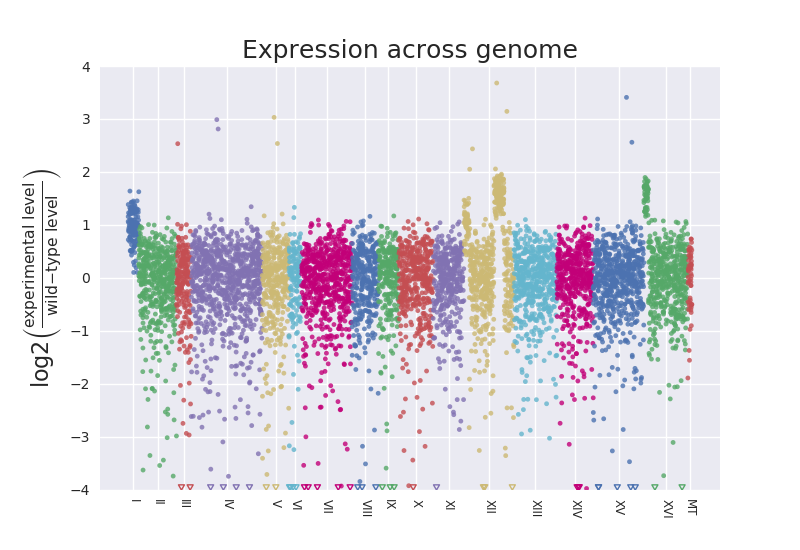

In [11]:
!mv sc_data_across_chr.png early_sc_plot.png
from IPython.display import Image
Image("early_sc_plot.png")

Besides the `--columns` option for designating which columns in the tab-separated input file hold the data, the script has other useful options and the rest of the notebook will be focused on illustrating those while also demonstrating using the script with the large (1.4 Gb) human GTF file.

First up will be using options to adjust the default y-axis labels.

#### Specifying text to use in y-axis labels.

As can be seen in the above image, the script defaults to putting `experimental` and `wild-type` as text in the labels of the y-axis in the plot. Using a couple of options, you can control the text used for both of these. The option `--base_desig` followed by the desired word to use can be used to specify the baseline/ wild-type designation to show in the plot. Similary, for the experimental text using  `--exp_desig` followed by text to use in its place.

The next two cells will run that and then show it in an approach like used earlier. We'll use 'KO' for the knockout and 'WT' for the other. (Note that we also use the shorter form of the `--columns` flag to illustrate shorter forms exist for most flags as detailed in the USAGE block.)

In [12]:
%%bash
python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv -cols 1,2,3 --exp_desig KO --base_desig WT


Reading annotation file and getting data on genes and chromosomes...Information for 7126 genes parsed...The chromosomes appear to be in roman numeral form....Parsing data file...7127 lines of data parsed and relative levels for 7126 genes recorded.../srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')

***Notice:***The 38 points beyond the bounds of y-axis are drawn as open triangles at the edge; a limit was imposed to avoid extreme values compressing the typically important range; run with `--no_limits` or `--no_log` to see these accurately.

Plot i

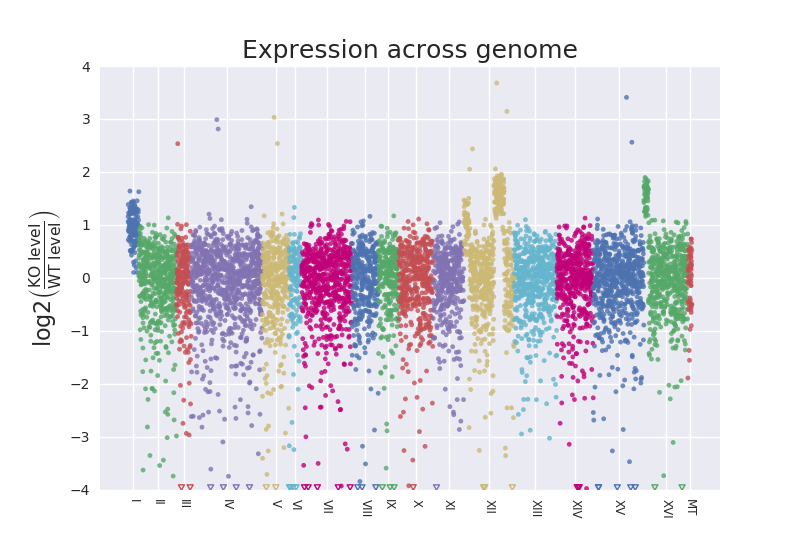

In [13]:
!mv sc_data_across_chr.png designation_example.png
from IPython.display import Image
Image("designation_example.png")

This next examples shows symbols like the delta sign used for deletions can be used in the y-axis text.

In [14]:
%%bash
python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv --columns 1,2,3 --exp_desig ΔYDR190C --base_desig WT


Reading annotation file and getting data on genes and chromosomes...Information for 7126 genes parsed...The chromosomes appear to be in roman numeral form....Parsing data file...7127 lines of data parsed and relative levels for 7126 genes recorded.../srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')

***Notice:***The 38 points beyond the bounds of y-axis are drawn as open triangles at the edge; a limit was imposed to avoid extreme values compressing the typically important range; run with `--no_limits` or `--no_log` to see these accurately.

Plot i

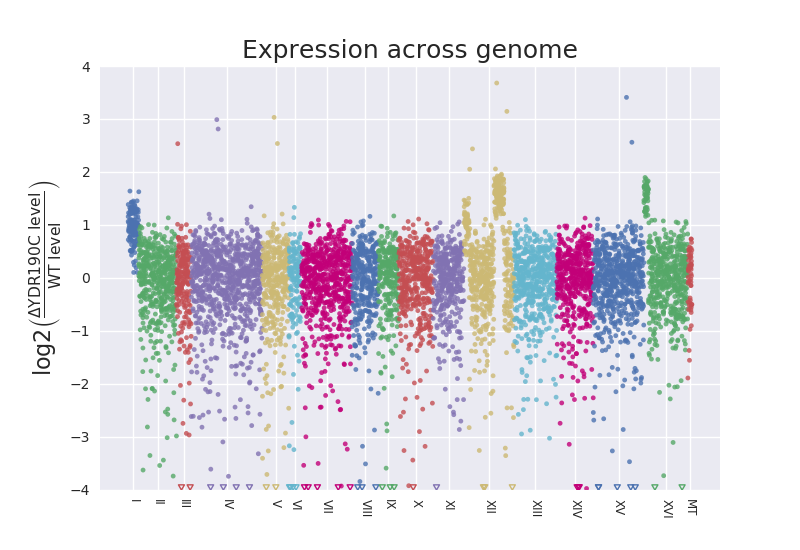

In [15]:
!mv sc_data_across_chr.png symbol_example.png
from IPython.display import Image
Image("symbol_example.png")

#### Illustrating the use of 'lines' from the origin and limiting to certain chromosomes

Using the same input files you can limit the plot to specific chromosomes. The chromosomes can be specified as one or a few of them separated by a comma after the `--chrs` option flag.

Additionally, instead of points, you can specify with the `--lines` flag that the data points be lines from zero to give more of skyline reflected in water aesthetic to the Manhattan plot-like nature of these plots. (The zero indicator being the waterline.) (This aesthetic came from seeing the `lines` option in Brent Pederson's [Manhattan plot script](https://github.com/brentp/bio-playground/blob/master/plots/manhattan-plot.py).)

The next two plots will utilize those options.

In [16]:
%%bash
python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv --columns 1,2,3 --chrs II,III,IV,V --lines --exp_desig ΔYDR190C --base_desig WT


Reading annotation file and getting data on genes and chromosomes...Information for 7126 genes parsed...The chromosomes appear to be in roman numeral form....Parsing data file...7127 lines of data parsed and relative levels for 7126 genes recorded.../srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')

***Notice:***The 8 points beyond the bounds of y-axis are drawn as open triangles at the edge; a limit was imposed to avoid extreme values compressing the typically important range; run with `--no_limits` or `--no_log` to see these accurately.

Plot im

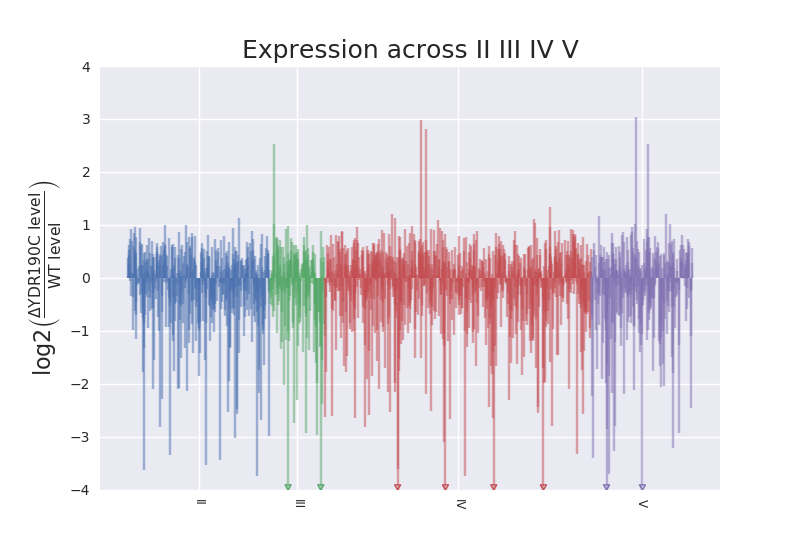

In [17]:
!mv sc_data_across_chr_II_III_IV_V.png few_chrs_example.png
from IPython.display import Image
Image("few_chrs_example.png")

In [18]:
%%bash
python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv --columns 1,2,3 --chrs XVI --exp_desig ΔYDR190C --base_desig WT


Reading annotation file and getting data on genes and chromosomes...Information for 7126 genes parsed...The chromosomes appear to be in roman numeral form....Parsing data file...7127 lines of data parsed and relative levels for 7126 genes recorded.../srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')

***Notice:***The 2 points beyond the bounds of y-axis are drawn as open triangles at the edge; a limit was imposed to avoid extreme values compressing the typically important range; run with `--no_limits` or `--no_log` to see these accurately.

Plot im

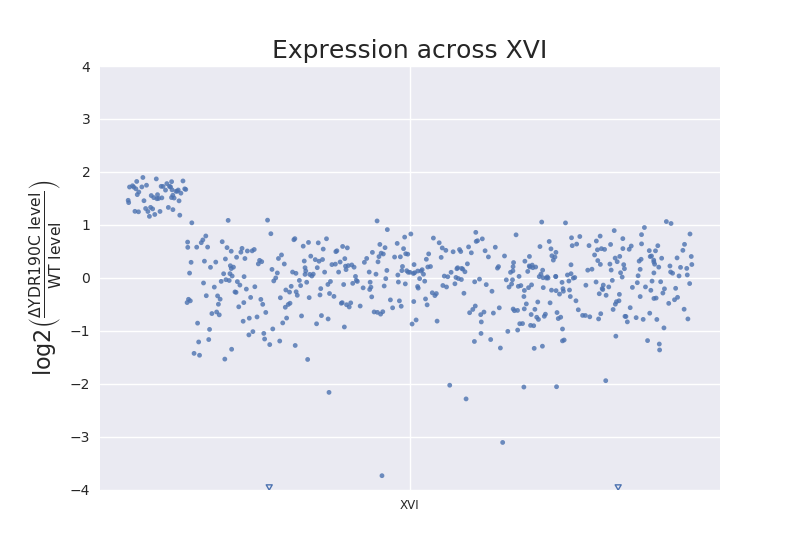

In [19]:
!mv sc_data_across_chr_XVI.png one_chr_example.png
from IPython.display import Image
Image("one_chr_example.png")

There are a couple things to note.

- The name of the plot image files gets appended with the chromosome designations automatically to aid in organization of files.
- The color of chromosome XVI in single chromosome plot doesn't match the one in the plot with all the chromosomes. We can address this for the case of the single chromosomes using the `--advance_color` flag.

#### Illustrating the use of 'advance_color' flag in conjunction with limiting to one chromosome

We can tell the script not to settle for the first color in the color series, and instead advance 15 more times **beyond the first** in the series to match what is seen for chromosome XVI when the entire genome is shown.

In [20]:
%%bash
python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv --columns 1,2,3 --chrs XVI --advance_color 15 --exp_desig ΔYDR190C --base_desig WT


Reading annotation file and getting data on genes and chromosomes...Information for 7126 genes parsed...The chromosomes appear to be in roman numeral form....Parsing data file...7127 lines of data parsed and relative levels for 7126 genes recorded.../srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')

***Notice:***The 2 points beyond the bounds of y-axis are drawn as open triangles at the edge; a limit was imposed to avoid extreme values compressing the typically important range; run with `--no_limits` or `--no_log` to see these accurately.

Plot im

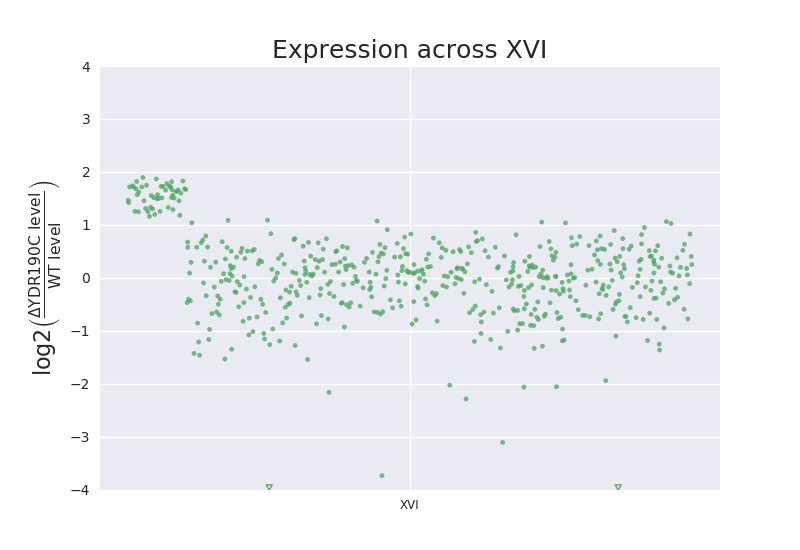

In [21]:
!mv sc_data_across_chr_XVI.png advancing_color_example.png
from IPython.display import Image
Image("advancing_color_example.png")

Now it matches the coloring for chromosome XVI seen in the earlier plots of the entire genome.

There is currently no way to specify this from the command line when plotting a few chromsosomes. However, the color series cycled through can be specified under 'USER ADJUSTABLE VALUES' and so it would be possible to save a custom version of the script with a few colors set to match what is needed and use that special version of the script with its distinctive name from the command line just has we have the default script.

#### Highlighting the trends within the data with the 'smooth' flag

When the `--smooth` flag is employed, a non-parametric strategy (LOWESS or Locally Weighted Scatterplot Smoothing) is used to fit a curve to the data points for each chromosome. It highlights deviations in the scatterplots better than one could estimate just by eye given so many points. If the `--smooth` flag is used a simplistic, automated assessment will be made for aneuploidy at the chromosome-level (or per scaffold) and an notice will be included in the report as the script runs if anueploidy is suggested. You'll need to examime further no matter the outsome of that assessment. Right now the simplistic approach errs on the side of reporting more false positives but the settings used can be adjusted. In fact, I found a setting of `deviation_factor = 0.5` to work better in regards to almost eliminating false-postives, but I left it as `deviation_factor = 0.25` in the posted script for now.

Three plots illustrate this along with combinations used earlier.

In [22]:
%%bash
python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv --smooth --lines --columns 1,2,3


Reading annotation file and getting data on genes and chromosomes...Information for 7126 genes parsed...The chromosomes appear to be in roman numeral form....Parsing data file...7127 lines of data parsed and relative levels for 7126 genes recorded.../srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')

***Notice:***The 38 points beyond the bounds of y-axis are drawn as open triangles at the edge; a limit was imposed to avoid extreme values compressing the typically important range; run with `--no_limits` or `--no_log` to see these accurately.
Aneuplo

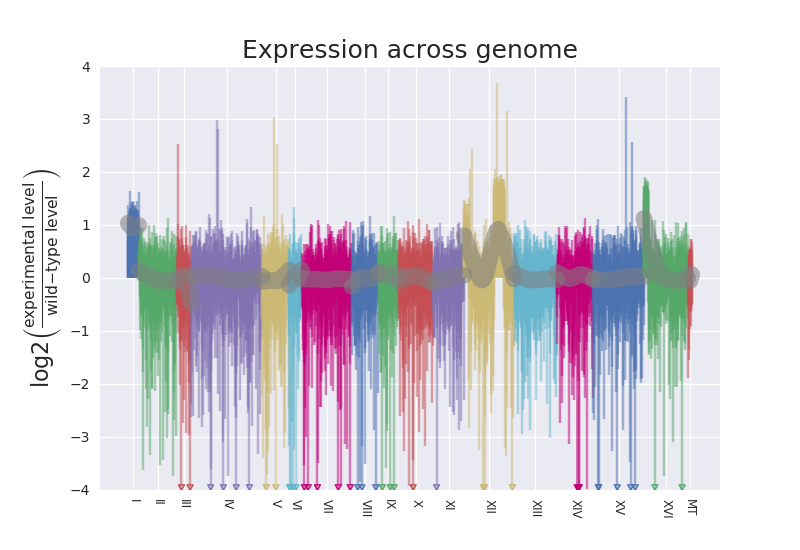

In [23]:
!mv sc_data_across_chr.png smooth_all_example.png
from IPython.display import Image
Image("smooth_all_example.png")

In [24]:
%%bash
python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv --columns 1,2,3 --smooth --chrs I,II,III --exp_desig ΔYDR190C --base_desig WT


Reading annotation file and getting data on genes and chromosomes...Information for 7126 genes parsed...The chromosomes appear to be in roman numeral form....Parsing data file...7127 lines of data parsed and relative levels for 7126 genes recorded.../srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')

***Notice:***The 2 points beyond the bounds of y-axis are drawn as open triangles at the edge; a limit was imposed to avoid extreme values compressing the typically important range; run with `--no_limits` or `--no_log` to see these accurately.
Aneuploi

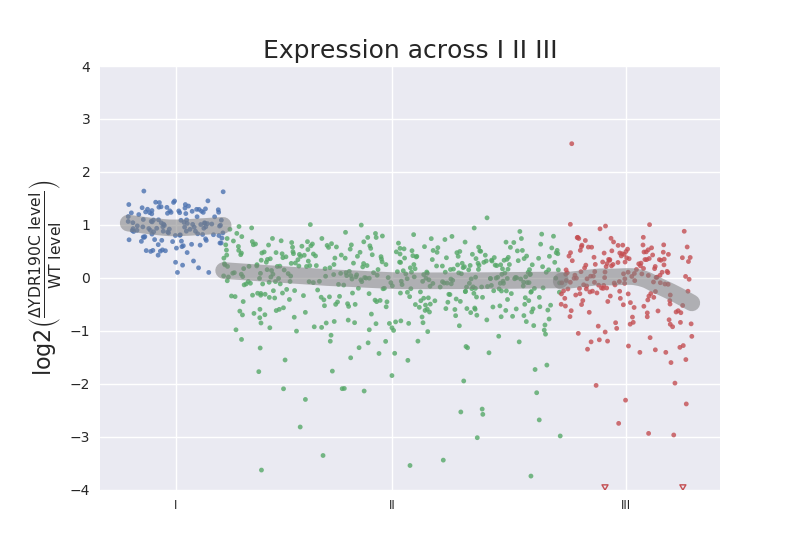

In [25]:
!mv sc_data_across_chr_I_II_III.png few_chrs_example.png
from IPython.display import Image
Image("few_chrs_example.png")

In [26]:
%%bash
python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv --columns 1,2,3 --smooth --chrs XVI --advance_color 15 --exp_desig ΔYDR190C --base_desig WT


Reading annotation file and getting data on genes and chromosomes...Information for 7126 genes parsed...The chromosomes appear to be in roman numeral form....Parsing data file...7127 lines of data parsed and relative levels for 7126 genes recorded.../srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')

***Notice:***The 2 points beyond the bounds of y-axis are drawn as open triangles at the edge; a limit was imposed to avoid extreme values compressing the typically important range; run with `--no_limits` or `--no_log` to see these accurately.

Plot im

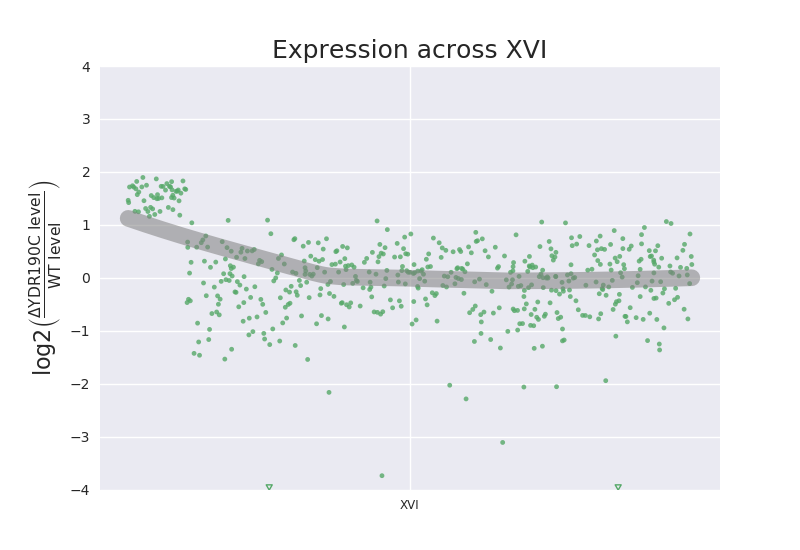

In [27]:
!mv sc_data_across_chr_XVI.png smooth_single_chr_example.png
from IPython.display import Image
Image("smooth_single_chr_example.png")

#### Other options

You can choose to turn off the limits on the y-axis with the `--no_limits` flag or use the `--no_log` flag to don't convert ratio to log2 value.

These final two yeast plots illustrate use of those options.

In [28]:
%%bash
python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv --no_limits --lines --columns 1,2,3


Reading annotation file and getting data on genes and chromosomes...Information for 7126 genes parsed...The chromosomes appear to be in roman numeral form....Parsing data file...7127 lines of data parsed and relative levels for 7126 genes recorded...

Plot image saved to: sc_data_across_chr.png


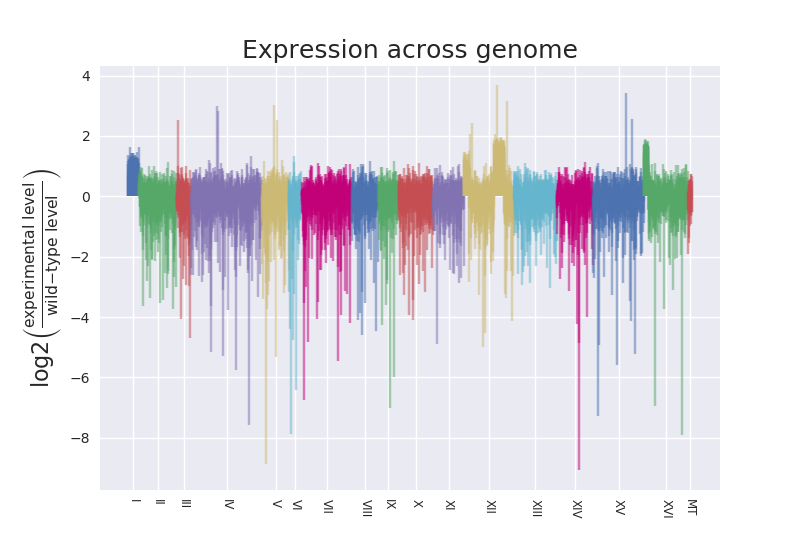

In [29]:
!mv sc_data_across_chr.png no_lmits_example.png
from IPython.display import Image
Image("no_lmits_example.png")

In [30]:
%%bash
python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv --no_log --lines --columns 1,2,3


Reading annotation file and getting data on genes and chromosomes...Information for 7126 genes parsed...The chromosomes appear to be in roman numeral form....Parsing data file...7127 lines of data parsed and relative levels for 7126 genes recorded...

Plot image saved to: sc_data_across_chr.png


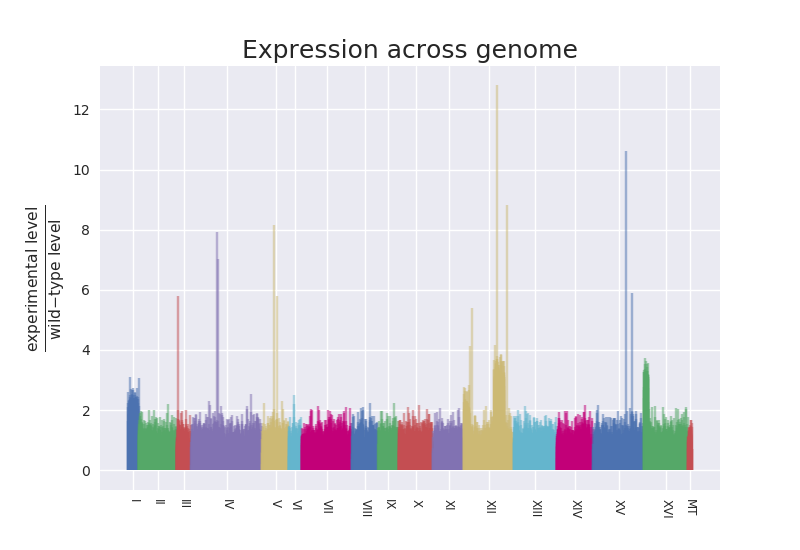

In [31]:
!mv sc_data_across_chr.png no_log_example.png
from IPython.display import Image
Image("no_log_example.png")

#### Generating scalable vector graphics file for high quality use/ publication.

**Not illustrated in this notebook here is the option to save as an '.svg'** (scalable vector graphics) file with the `--save_vg` (abbreviated `-svg`) flag, instead of the default '.png' image. After download form here, the scalable vector graphics file can be viewed using your favorite modern browswer or edited in your favorite vector graphics program like Adobe Illustrator or Inskscape. **Use of the ability to produce a vector grpahics version of the plot is recommended for publication** because it is infintiely scalable without loss of resolution, unlike the '.png' images produced here by default. (This was done to largely focus on using the '.png' images for developing the plot. The comparable '.svg' images produced are much larger files. By way of comparison, the '.png' image file produced by the above is 36 kb and the corresponding '.svg' made with the following command is 1.2 Mb. However, technical aspects also factor to the reasons this is not shown here. Because while cells can be used to show '.svg' files, reading '.svg' involves running code and for security reasons they do not get run when a notebook is started the way a '.png' does. Thus, they '.svg' would look like they weren't rendering in this environement when they should and could.)

```python plot_expression_across_chromosomes.py R64-1-1genes.gtf sc_data.tsv--no_log --lines --columns 1,2,3 -svg```

## Basic use examples set #2: Using from the command line (or equivalent / similar) with human genetic information

**CURRENTLY THIS WON'T RUN IN SESSIONS LAUNCHED FROM MYBINDER.ORG**. *Your mileage may vary.* To get this section to work you are better off elsewhere with more computational/memore capacity, such as Cyverse.* [The static view](https://nbviewer.jupyter.org/github/fomightez/cl_sq_demo-binder/blob/master/notebooks/demo%20plot_expression_across_chromosomes.ipynb) will show this section run and rendered if that will help.

Above illustrated the main options of the script using yeast data. The next few examples illustrate use of the script with human genetic information.

The only difference you should notice is that it takes much more time to run. The human GTF file is over 100 times larger than yeast one. Earlier when we generated mock data for humans, we used only a fraction, specifically only one eighth, for that reason. You won't want to wait for it to work with mock data and so we used less genes here but illustrate roughly how things might look for human data.

**Be patient.**  
(Although there is also a small chance you'll exceed computational/memory capacity in this environment when trying to run this and it could fail silently.)

### Generate mock human data to complete preparation

First we will generate the human mock data as we did earlier for yeast. We skipped doing this earlier because dealing with the human GTF file that is over 100 times larger than the yeast one can take substantially longer and I didn't want to delay getting into the demo. As described above we are using the `--use_fraction` flag to only generate data for an eigth of the human genes. This is being done to speed up plotting for the demo only. You'd want to use all your data.

In [ ]:
%run mock_expression_ratio_generator.py Homo_sapiens.GRCh38.88.chr.gtf --use_fraction


Reading annotation file and getting data on genes and chromosomes...

To make things easier, we'll rename the file to something more convenient by running the next cell.

In [ ]:
!mv Homo_sapiens.GRCh38.88.chr_mock_expression_ratios.tsv hs_data.tsv # human

Now finally, we are ready to try plotting human (mock) data.

### Plot human data

**Be patient.**  
(Although there is also a small chance you'll exceed computational/memory capacity in this environment when trying to run this and it could fail silently.)

In [ ]:
%%bash
python plot_expression_across_chromosomes.py Homo_sapiens.GRCh38.88.chr.gtf hs_data.tsv --columns 1,2,3 --exp_desig ko --base_desig in

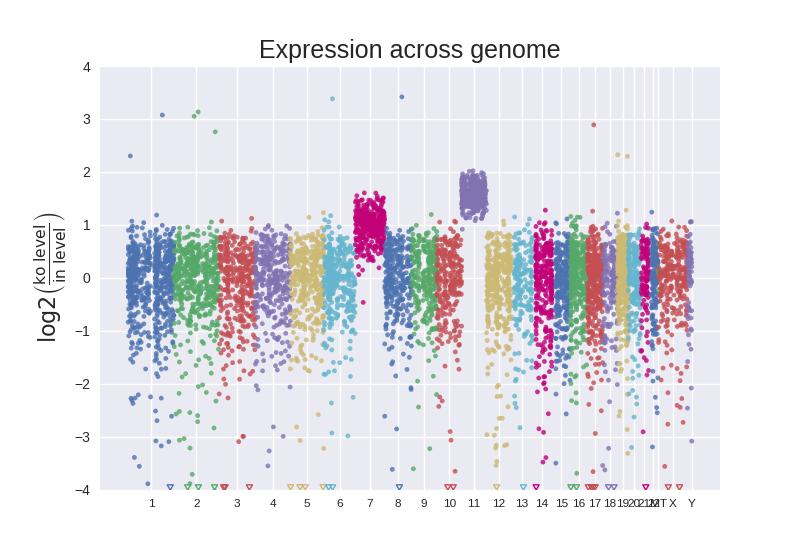

In [2]:
!mv hs_data_across_chr.png human_example.png
from IPython.display import Image
Image("human_example.png")

Bear in mind that would take even longer with all the genes. Just 7272 were used for that plot.


----

Enjoy!

Upload your own sequence files to any running Jupyter session and adapt the commands in this notebook to search wihin them. Edit the notebook or copy the necessary cells to make the script work with your own data.

----
### ADVANCED DEVELOPMENT NOTE

If editing the script (***ATYPICAL***) and using import of the main function to test changes here in this Jupyter notebook, you'll need to run the following code in order to specifically trigger import of the updated version of the code for the function subsequent to any edit. Otherwise, without a restart of the kernel, the notebook environment will see any call to import the function and essentially ignore it as it considers that function already imported into the notebook environment.

In [22]:
# Run this to have new code reflected in the version of the function in memory within the notebook namespace
import importlib
import plot_expression_across_chromosomes ; importlib.reload( plot_expression_across_chromosomes  ); from plot_expression_across_chromosomes  import plot_expression_across_chromosomes 
# above line from https://stackoverflow.com/a/11724154/8508004

------

## Basic use example set #3: Use the main function via import <---DOES NOT WORK BECAUSE SCRIPT HAS NOT YET BEEN REARRANGED. Note, the `mock_expression_ratio_generator.py` has and I should demonstrate that more somewhere.

Very useful for when using this in a Jupyter notebook to build into a pipeline or workflow.

Prepare first by importing the main function from the script into the notbeook environment.

In [5]:
from plot_expression_across_chromosomes import plot_expression_across_chromosomes

usage: plot_expression_across_chromosomes.py [-h] [-cols COLUMNS] [-l]
                                             [-chr CHRS] [-nl] [-nlim] [-s]
                                             [-ed EXP_DESIG] [-bd BASE_DESIG]
                                             [-svg] [-ndh] [-ac ADVANCE_COLOR]
                                             ANNOTATION_FILE DATA_FILE
plot_expression_across_chromosomes.py: error: the following arguments are required: DATA_FILE


SystemExit: 2

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


(That call will look redundant; however, it actually means `from the file plot_expression_across_chromosomes.py  import the plot_expression_across_chromosomes() function`.)

Then call that function and provide the needed arguments in the call. The needed arguments are ???

The function will???


----

Enjoy!

Upload your own sequence files to any running Jupyter session and adapt the commands in this notebook to search wihin them. Edit the notebook or copy the necessary cells to make the script work with your own data.

----
### ADVANCED DEVELOPMENT NOTE

If editing the script (***ATYPICAL***) and using import of the main function to test changes here in this Jupyter notebook, you'll need to run the following code in order to specifically trigger import of the updated version of the code for the function subsequent to any edit. Otherwise, without a restart of the kernel, the notebook environment will see any call to import the function and essentially ignore it as it considers that function already imported into the notebook environment.

In [22]:
# Run this to have new code reflected in the version of the function in memory within the notebook namespace
import importlib
import plot_expression_across_chromosomes ; importlib.reload( plot_expression_across_chromosomes  ); from plot_expression_across_chromosomes  import plot_expression_across_chromosomes 
# above line from https://stackoverflow.com/a/11724154/8508004

----
